**Importing Important Libraries**

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np

In [3]:
z = pd.read_csv(r"C:\Users\skj_h\OneDrive\Desktop\dataset\day.csv")
z

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [4]:
z.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
z.shape

(730, 16)

In [6]:
z.size

11680

In [7]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
z.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [9]:
z.ndim

2

In [10]:
z.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

<Axes: xlabel='dteday', ylabel='cnt'>

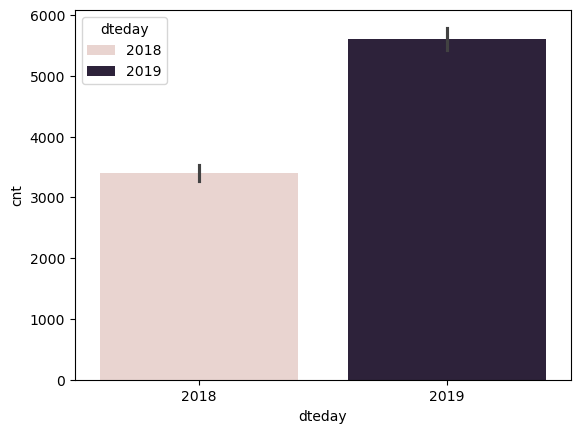

In [11]:
sns.barplot(x = pd.DatetimeIndex(z["dteday"]).year, y = z["cnt"], data = z, hue = pd.DatetimeIndex(z["dteday"]).year)

<Axes: xlabel='dteday', ylabel='cnt'>

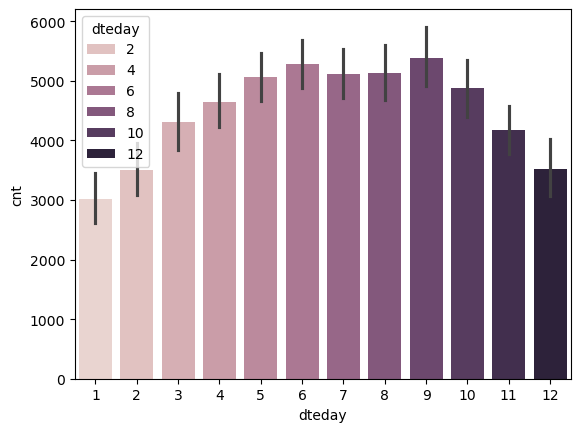

In [12]:
sns.barplot(x = pd.DatetimeIndex(z["dteday"]).month, y = z["cnt"], data = z, hue = pd.DatetimeIndex(z["dteday"]).month)

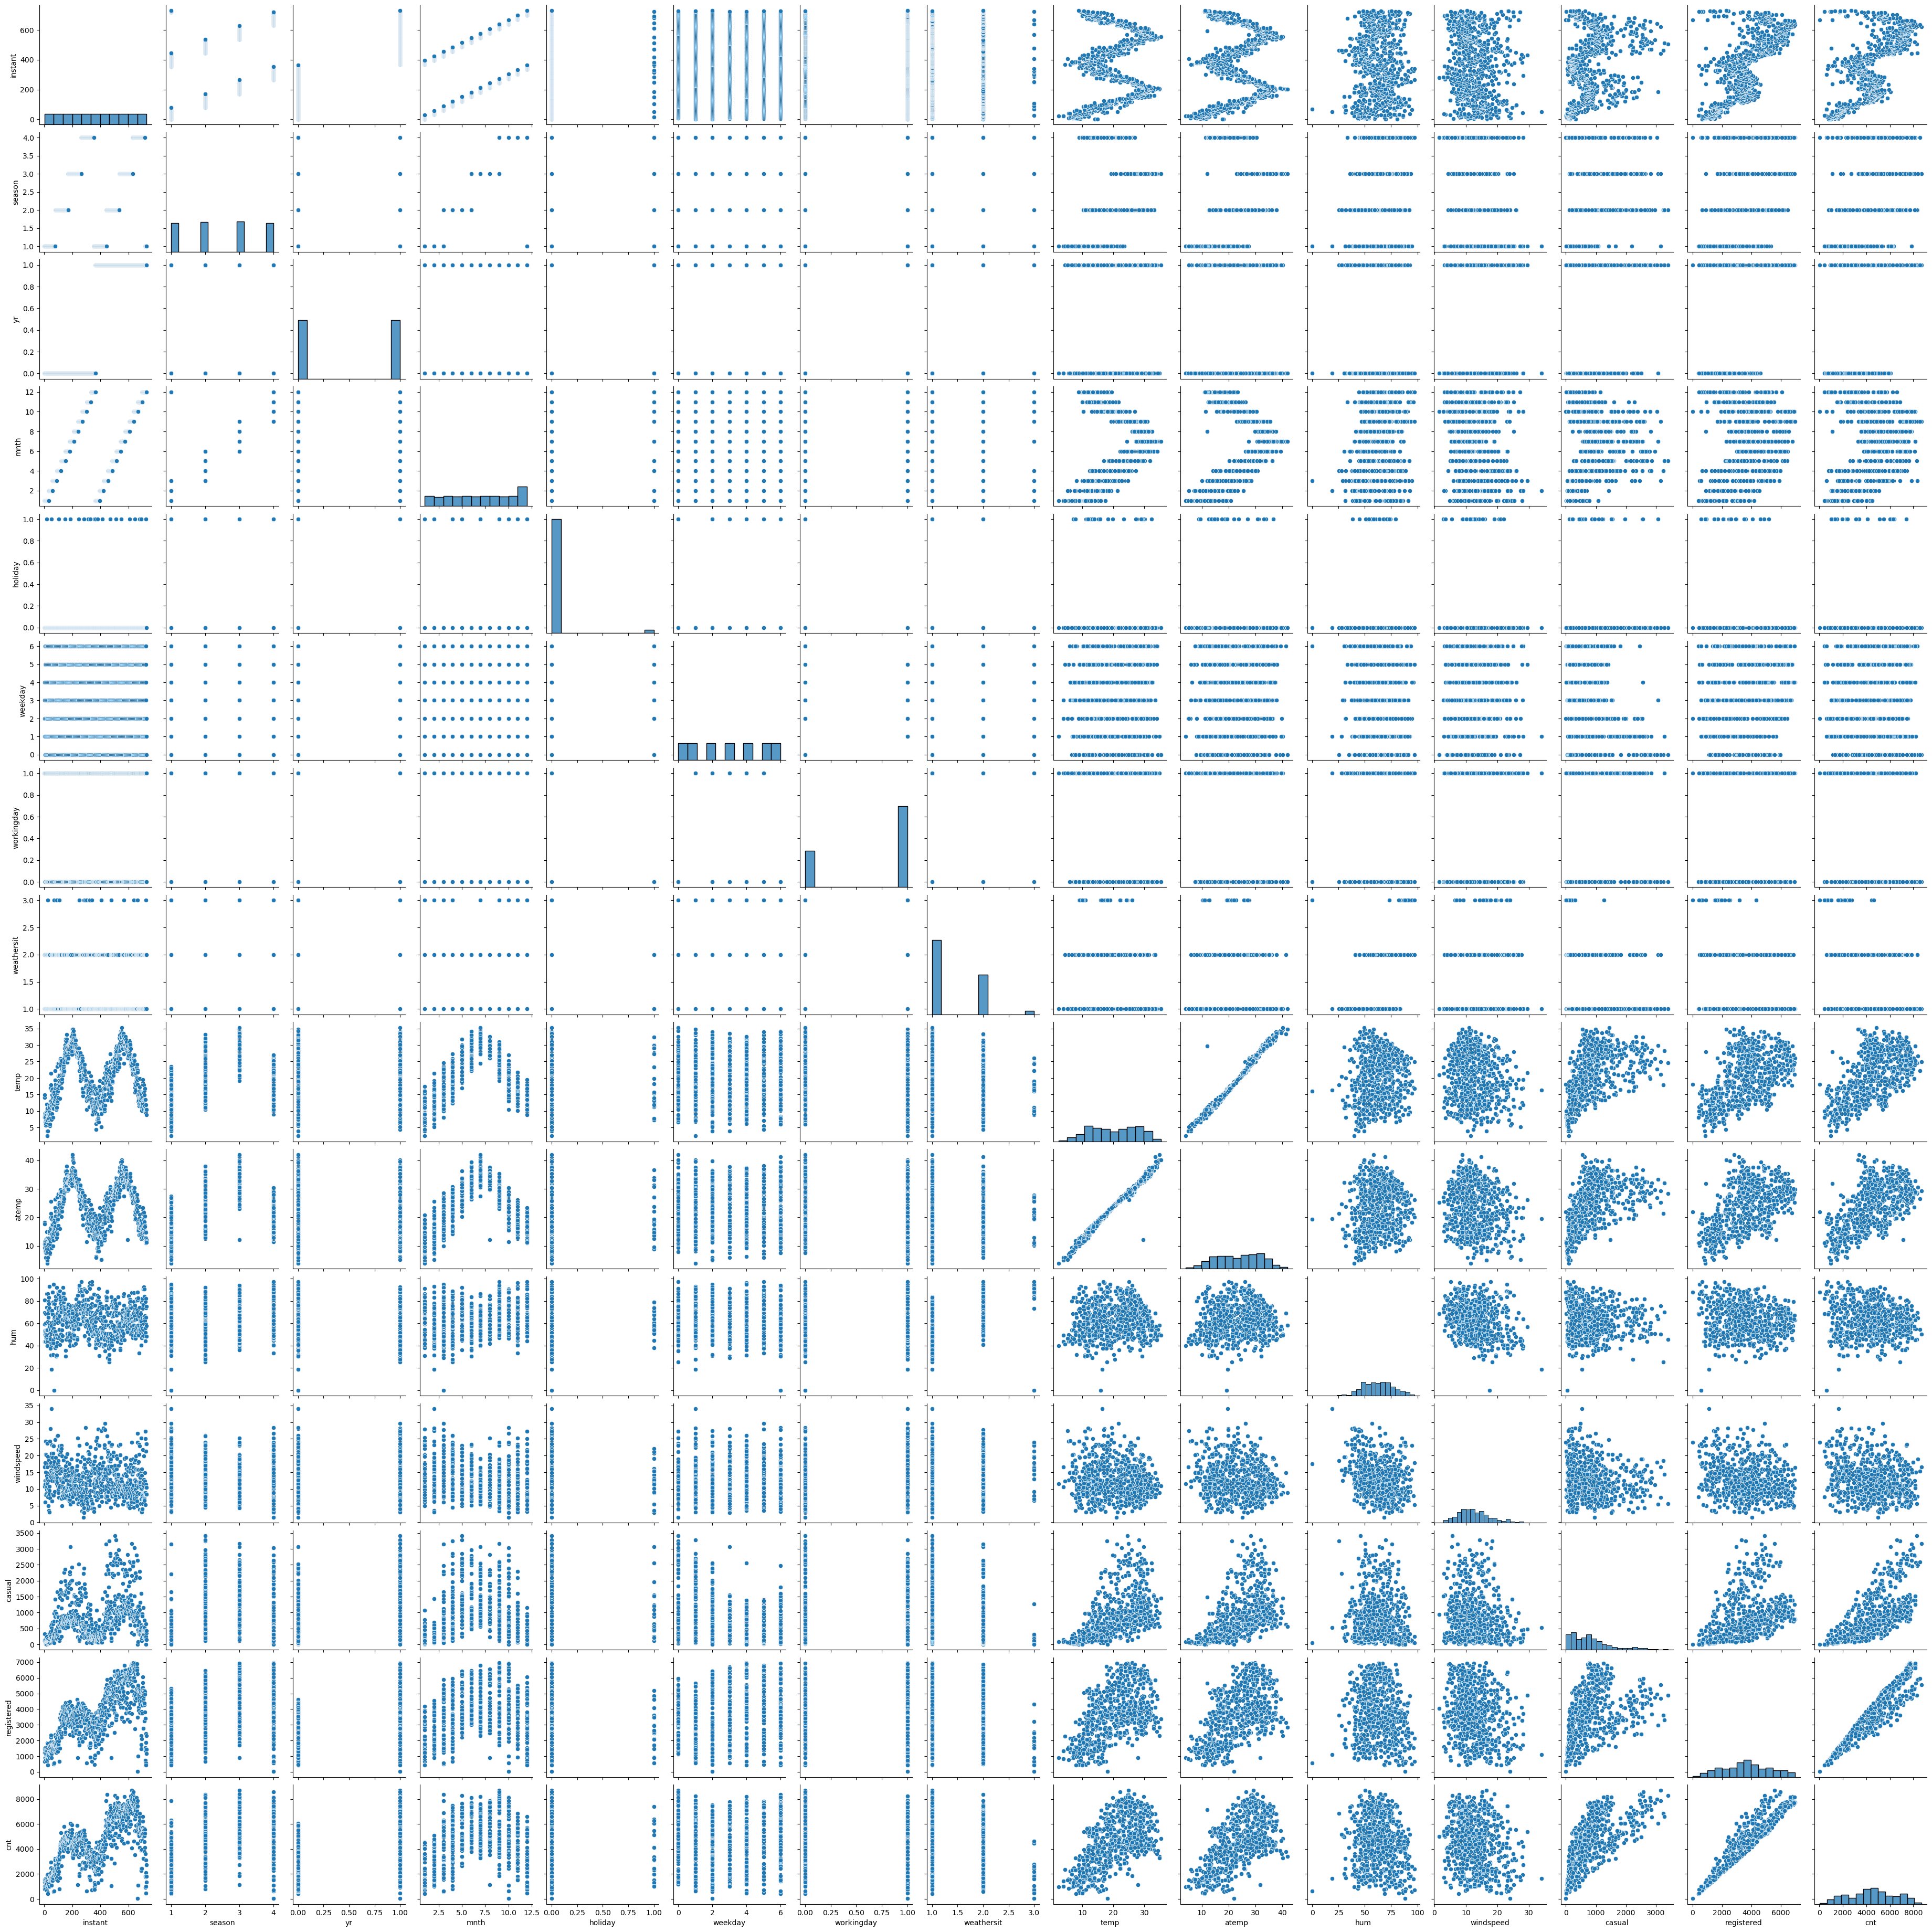

In [13]:
sns.pairplot(z)

In [14]:
b = z.copy()
for i in b:
    if(b[i].dtype == "object"):
        b.drop([i], axis =1, inplace = True)

In [15]:
b

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


<Axes: >

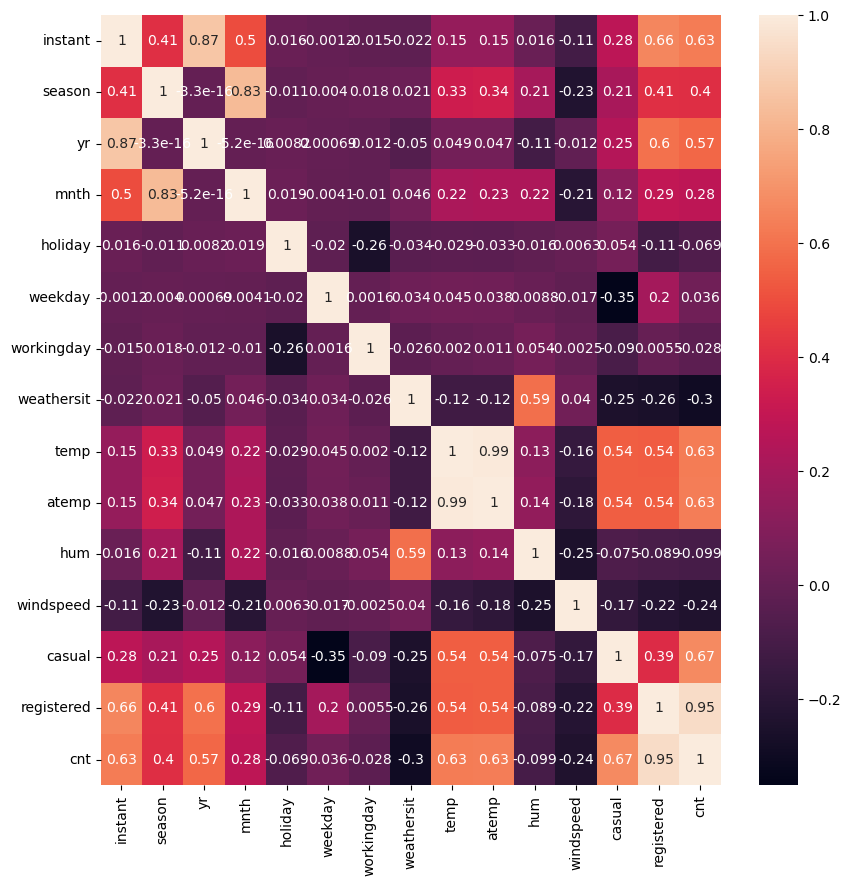

In [16]:
plt.figure(figsize = (10, 10))
sns.heatmap(b.corr(), annot = True, alpha = 1)

In [17]:
b.corr()["cnt"].sort_values(ascending = False)

cnt           1.000000
registered    0.945411
casual        0.672123
atemp         0.630685
instant       0.629896
temp          0.627044
yr            0.569728
season        0.404584
mnth          0.278191
weekday       0.036183
workingday   -0.027640
holiday      -0.068764
hum          -0.098543
windspeed    -0.235132
weathersit   -0.295929
Name: cnt, dtype: float64

<Axes: xlabel='registered', ylabel='cnt'>

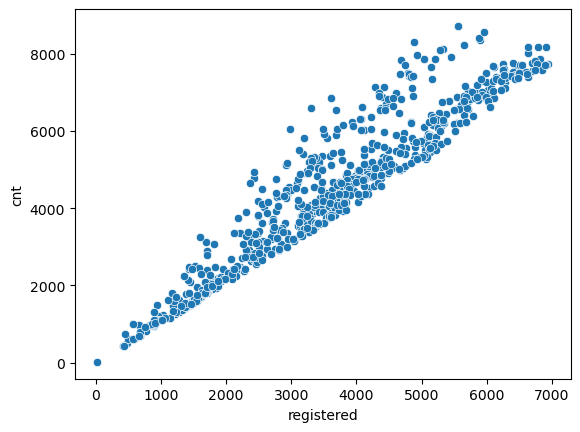

In [18]:
sns.scatterplot(x = z["registered"], y = z["cnt"], data = z)

In [19]:
X = z["registered"]
Y = z["cnt"]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [21]:
x_train = np.array(x_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)

In [22]:
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [23]:
n = LinearRegression()
n.fit(x_train, y_train)

LinearRegression()

In [24]:
y_predict_train = n.predict(x_train)
r2_train = r2_score(y_true = y_train, y_pred = y_predict_train)

In [25]:
round(r2_train, 2)*100

90.0

In [26]:
y_predict_test = n.predict(x_test)
r2_test = r2_score(y_true = y_test, y_pred = y_predict_test)

In [27]:
round(r2_test, 2)*100

88.0

In [28]:
res_train = y_train - y_predict_train

In [29]:
res_train

array([[-4.23700127e+02],
       [-3.15277209e+02],
       [ 2.10863227e+02],
       [-9.33739783e+01],
       [ 3.76578142e+02],
       [-2.93064352e+02],
       [ 1.36509132e+03],
       [-3.24003143e+02],
       [-5.07032694e+02],
       [-5.54194070e+02],
       [ 1.50171217e+03],
       [ 1.35408340e+03],
       [ 8.38435299e+02],
       [-7.60795736e+01],
       [ 2.61650809e+00],
       [-4.35682197e+02],
       [ 4.23248682e+02],
       [ 1.43792143e+03],
       [ 1.41455420e+03],
       [ 7.41927736e+02],
       [ 1.14022414e+03],
       [-5.52404927e+02],
       [-4.49847378e+02],
       [-8.81888249e+02],
       [-5.72524433e+02],
       [-2.48224019e+02],
       [-1.24586437e+02],
       [-7.67652388e+01],
       [ 1.07827269e+02],
       [-1.20325593e+02],
       [ 3.29453659e+01],
       [ 9.71480276e+02],
       [ 4.20083200e+02],
       [ 6.94522447e+02],
       [ 6.74629472e+01],
       [ 7.37812240e+02],
       [ 1.87857314e+02],
       [-7.28946749e+02],
       [-5.3

<Axes: ylabel='Density'>

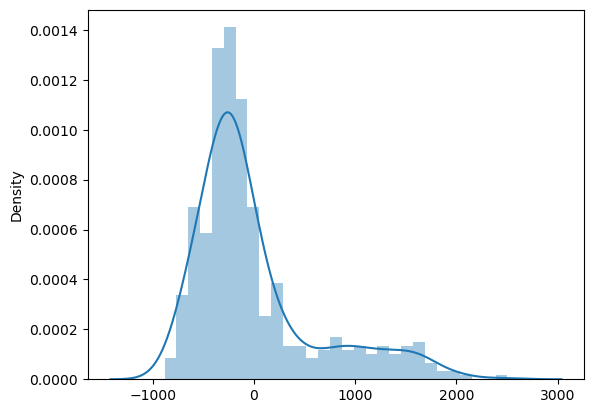

In [30]:
sns.distplot(res_train, kde = True)

In [31]:
res_test = y_test - y_predict_test

In [32]:
res_test

array([[2342.50010927],
       [-255.39140377],
       [-386.63612292],
       [   4.07088057],
       [-201.55027504],
       [-677.65755803],
       [   8.9170187 ],
       [-134.22522263],
       [1747.38240973],
       [-200.25888025],
       [ 293.38140999],
       [1351.93995877],
       [-170.03640242],
       [ 157.7064624 ],
       [-509.03920812],
       [  21.81594909],
       [ -82.33440834],
       [-420.49197887],
       [-717.17774078],
       [-215.46312642],
       [-161.52422828],
       [-320.27551018],
       [2011.94156049],
       [-445.02849057],
       [-241.13206488],
       [-691.74410465],
       [-274.46192245],
       [ -61.68840995],
       [1307.05856129],
       [ -65.52413153],
       [  79.13218666],
       [-448.74921081],
       [-383.92220731],
       [-475.65976173],
       [-406.552081  ],
       [  -4.72016485],
       [ 659.70245273],
       [1115.75053657],
       [-334.31137151],
       [-471.68620624],
       [-605.49017291],
       [ -35.460

<Axes: ylabel='Density'>

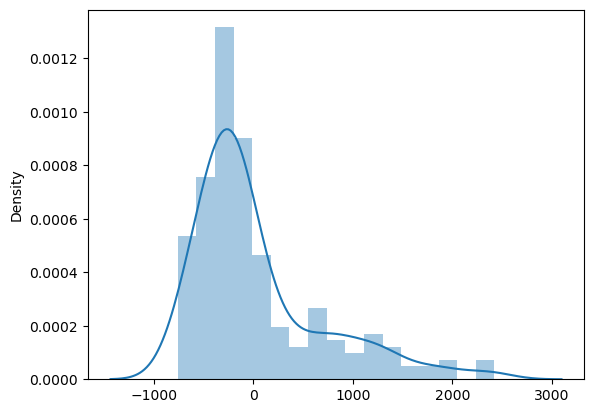

In [33]:
sns.distplot(res_test, kde = True)